## Project: Investigate a Dataset - [noshow appointments]

### Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction
This dataset collects information from 100k medical appointments in Brazil and is focused on the question of whether or not patients show up for their appointment.



### We will try to solve this questions about our data.
    1. which age/gender care more about his health?
    2. If Scholarship effect about attendence?
    3. Handcap is effect about attendence?
    4. If waiting time effect about attendance?


In [132]:
# Import all library that will used
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

<a id='wrangling'></a>
## Data Wrangling

In [133]:
# Read dataset and assign it 
df = pd.read_csv('noshowappointments-kagglev2-may-2016.csv')
# To see sample of data
df.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [134]:
# To show summary of data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
PatientId         110527 non-null float64
AppointmentID     110527 non-null int64
Gender            110527 non-null object
ScheduledDay      110527 non-null object
AppointmentDay    110527 non-null object
Age               110527 non-null int64
Neighbourhood     110527 non-null object
Scholarship       110527 non-null int64
Hipertension      110527 non-null int64
Diabetes          110527 non-null int64
Alcoholism        110527 non-null int64
Handcap           110527 non-null int64
SMS_received      110527 non-null int64
No-show           110527 non-null object
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


### Data Cleaning
Here we will handling miss values, duplicate values and sure the datatype are right or drop columns that we won't need them

In [135]:
# here I copied the data this step maybe not necessary
new_df = df.copy()

In [136]:
# Check if there's missing values
sum(new_df.isna().any())

0

In [137]:
# Check if there are duplicated values
sum(new_df.duplicated())

0

### we note that patientId have float number should convert to int

## but this operation we don't need it because won't help us in analysis you could skip this and drop it if you wanna

In [138]:
non_int_patientIds = new_df[~new_df['PatientId'].apply(lambda x: x.is_integer())]
# we use ~ before condition to return False of them 
non_int_patientIds 

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
3950,93779.52927,5712759,F,2016-05-18T09:12:29Z,2016-05-18T00:00:00Z,33,CENTRO,0,0,0,0,0,0,No
73228,537615.28476,5637728,F,2016-04-29T07:19:57Z,2016-05-06T00:00:00Z,14,FORTE SÃO JOÃO,0,0,0,0,0,1,No
73303,141724.16655,5637648,M,2016-04-29T07:13:36Z,2016-05-02T00:00:00Z,12,FORTE SÃO JOÃO,0,0,0,0,0,0,No
100517,39217.84439,5751990,F,2016-05-31T10:56:41Z,2016-06-03T00:00:00Z,44,PRAIA DO SUÁ,0,0,0,0,0,0,No
105430,43741.75652,5760144,M,2016-06-01T14:22:58Z,2016-06-01T00:00:00Z,39,MARIA ORTIZ,0,0,1,0,0,0,No


In [139]:
# check if Petient id when we convert it to int will not be exist in data
for i in non_int_patientIds['PatientId']:
    i = int(i)
    if new_df.query('PatientId == {}'.format(i)).empty:
        print('this id',i,'not exist')
    else:
        print('this id',i,'is exist')

this id 93779 not exist
this id 537615 not exist
this id 141724 not exist
this id 39217 not exist
this id 43741 not exist


In [140]:
new_df['PatientId'] = new_df['PatientId'].astype(int)

## I will drop PetientId and AppointmentID becuse I don't need them in analysis

In [141]:
new_df.drop(['PatientId', 'AppointmentID'],axis=1, inplace=True)

## check if there are schedualDay after appointmentDay

In [142]:
sum(new_df['ScheduledDay'] > new_df['AppointmentDay'])

38568

## Drop this rows from data

In [143]:
new_df.drop(new_df[new_df['ScheduledDay'] > new_df['AppointmentDay']].index, inplace=True)

In [144]:
# check again the diff between day
sum(new_df['ScheduledDay'] > new_df['AppointmentDay'])

0

## check if there are age less than 0

In [146]:
sum(new_df['Age'] < 0)

0

## Here I will convert schadualDay and AppointmentDay to datetime

In [147]:
new_df['ScheduledDay'] = pd.to_datetime(new_df['ScheduledDay'])
# I removed time in Appointment cause there are zero's only
new_df['AppointmentDay'] = pd.to_datetime(new_df['AppointmentDay'])
new_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 71959 entries, 5 to 110526
Data columns (total 12 columns):
Gender            71959 non-null object
ScheduledDay      71959 non-null datetime64[ns, UTC]
AppointmentDay    71959 non-null datetime64[ns, UTC]
Age               71959 non-null int64
Neighbourhood     71959 non-null object
Scholarship       71959 non-null int64
Hipertension      71959 non-null int64
Diabetes          71959 non-null int64
Alcoholism        71959 non-null int64
Handcap           71959 non-null int64
SMS_received      71959 non-null int64
No-show           71959 non-null object
dtypes: datetime64[ns, UTC](2), int64(7), object(3)
memory usage: 7.1+ MB


In [148]:
new_df.head()

,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
5,F,2016-04-27 08:36:51+00:00,2016-04-29 00:00:00+00:00,76,REPÚBLICA,0,1,0,0,0,0,No
6,F,2016-04-27 15:05:12+00:00,2016-04-29 00:00:00+00:00,23,GOIABEIRAS,0,0,0,0,0,0,Yes
7,F,2016-04-27 15:39:58+00:00,2016-04-29 00:00:00+00:00,39,GOIABEIRAS,0,0,0,0,0,0,Yes
9,F,2016-04-27 12:48:25+00:00,2016-04-29 00:00:00+00:00,19,CONQUISTA,0,0,0,0,0,0,No
10,F,2016-04-27 14:58:11+00:00,2016-04-29 00:00:00+00:00,30,NOVA PALESTINA,0,0,0,0,0,0,No


<a id='eda'></a>
## Exploratory Data Analysis

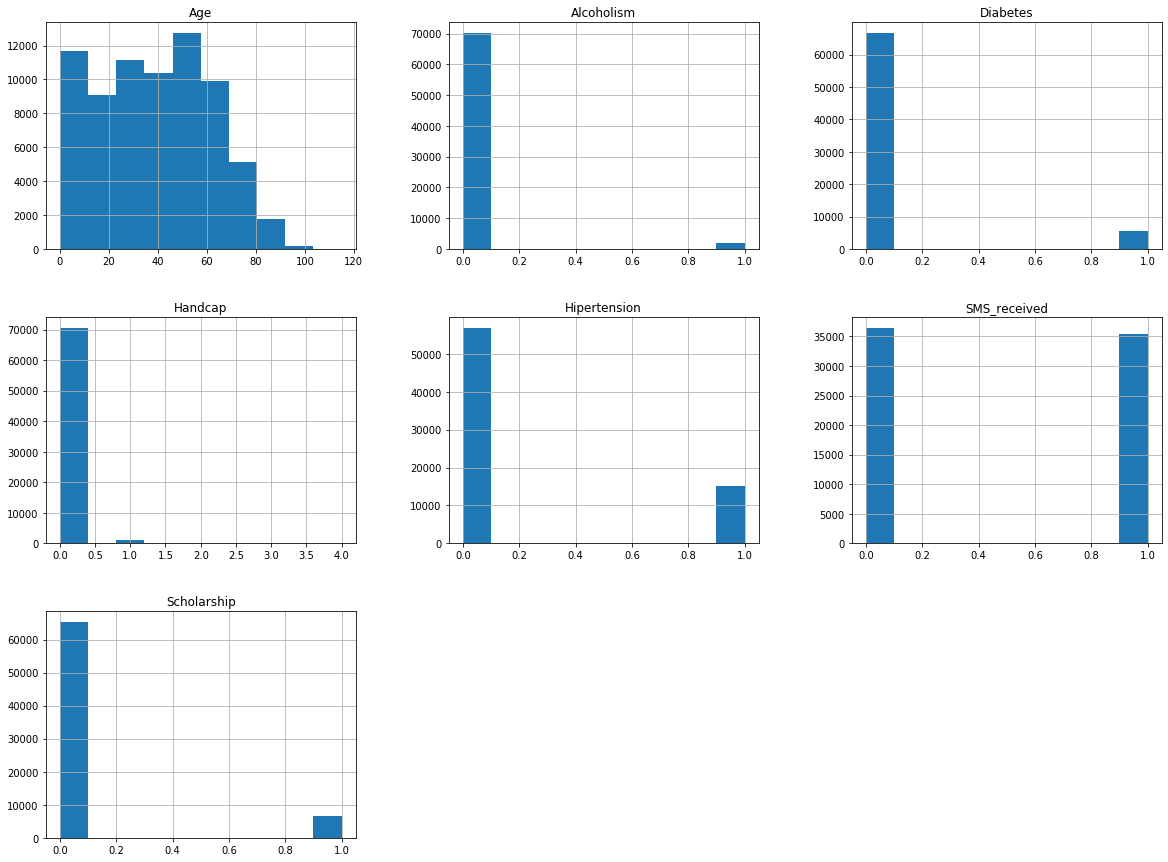

In [149]:
new_df.hist(figsize=(20, 15));

In [150]:
new_df.nunique()

Gender                2
ScheduledDay      68666
AppointmentDay       27
Age                 102
Neighbourhood        80
Scholarship           2
Hipertension          2
Diabetes              2
Alcoholism            2
Handcap               5
SMS_received          2
No-show               2
dtype: int64

In [151]:
new_df['Handcap'].unique()

array([0, 1, 2, 3, 4], dtype=int64)

## We assign attendance and absent to do operation 

In [152]:
attend = new_df[new_df['No-show'] == 'No']
absent = new_df[new_df['No-show'] == 'Yes']

## Q1 (which age care more about health) ?

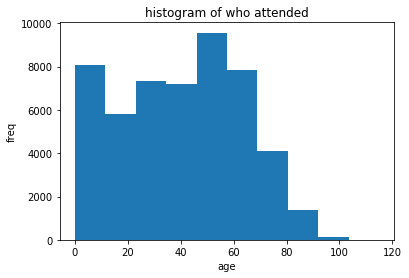

In [153]:
plt.hist(attend['Age'])
plt.title('histogram of who attended')
plt.xlabel('age')
plt.ylabel('freq');

we see that between 50 to 60 are the most attendance then 0 to 10

## Q2 (which gender care more about health ) ?

In [154]:
# function to draw bar
def draw(labels,data,title,xlabel,ylabel):
    
    plt.bar(labels,data.value_counts())
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel);

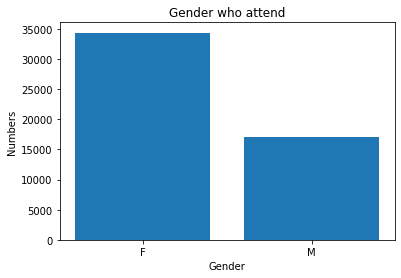

In [155]:
draw(['F', 'M'],attend['Gender'],'Gender who attend','Gender','Numbers')

we see here that Females are more care Male's about their self

## Q3 ( if Scholarship effect about attendence) ?

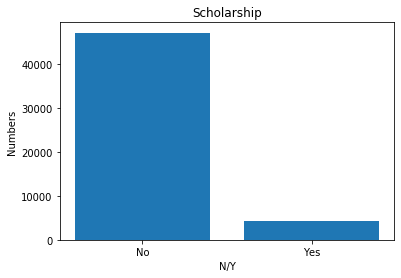

In [157]:
draw(['No', 'Yes'],attend['Scholarship'],'Scholarship','N/Y','Numbers')

we see that most of patients who attend didn't  enroll in Barasilian welfare program

## Q4 ( Handcap is effect about attendence) ?

In [158]:
attend_handcap = attend['Handcap'].value_counts()
attend_handcap

0    50464
1      888
2       78
3        6
4        1
Name: Handcap, dtype: int64

In [159]:
# get total to do operation
tot_handcap = new_df['Handcap'].value_counts()
tot_handcap

0    70652
1     1185
2      112
3        8
4        2
Name: Handcap, dtype: int64

In [160]:
# to get the percent just dividing group to total and * 100
percent = [] # I define this to store the numbers to use it in drawing
for i in range(len(attend_handcap)):
    print("people who's disability",i,'and attend',' =>',100*(attend_handcap[i]/tot_handcap[i]),'%')
    percent.append(100*(attend_handcap[i]/tot_handcap[i]))

people who's disability 0 and attend  => 71.42614504897243 %
people who's disability 1 and attend  => 74.9367088607595 %
people who's disability 2 and attend  => 69.64285714285714 %
people who's disability 3 and attend  => 75.0 %
people who's disability 4 and attend  => 50.0 %


In [161]:
new_df['waitTime'] = new_df['AppointmentDay'] - new_df['ScheduledDay']
new_df['waitTime'] = pd.to_datetime(new_df['waitTime']).dt.day

C:\MyAnaconda\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: Passing timedelta64-dtype data is deprecated, will raise a TypeError in a future version
  


In [162]:
new_df.head()

,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show,waitTime
5,F,2016-04-27 08:36:51+00:00,2016-04-29 00:00:00+00:00,76,REPÚBLICA,0,1,0,0,0,0,No,2
6,F,2016-04-27 15:05:12+00:00,2016-04-29 00:00:00+00:00,23,GOIABEIRAS,0,0,0,0,0,0,Yes,2
7,F,2016-04-27 15:39:58+00:00,2016-04-29 00:00:00+00:00,39,GOIABEIRAS,0,0,0,0,0,0,Yes,2
9,F,2016-04-27 12:48:25+00:00,2016-04-29 00:00:00+00:00,19,CONQUISTA,0,0,0,0,0,0,No,2
10,F,2016-04-27 14:58:11+00:00,2016-04-29 00:00:00+00:00,30,NOVA PALESTINA,0,0,0,0,0,0,No,2


## Q5 (if waiting time effect about attendance ) ?

In [163]:
new_df['waitTime'].unique()

array([ 2,  3,  1,  4,  9, 29, 10, 23, 11, 18, 17, 14, 28, 24, 21, 15, 16,
       22, 12, 30, 31, 25,  8,  6,  7, 13, 19, 26, 27, 20,  5],
      dtype=int64)

,waitTime
count,71959.000000
mean,10.464459
std,8.509666
min,1.000000
25%,4.000000
50%,7.000000
75%,16.000000
max,31.000000


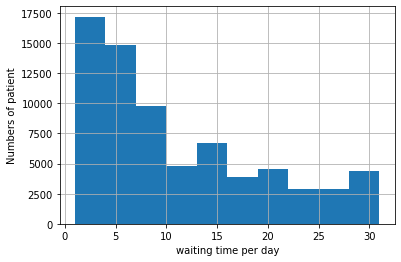

In [164]:
draw = new_df['waitTime'].hist()
draw.set_ylabel('Numbers of patient')
draw.set_xlabel('waiting time per day')
pd.DataFrame(new_df['waitTime'].describe())

this draw mean that attendance decrease when waiting time increase

In [165]:
last = new_df.query('waitTime > 25')

In [166]:
result = last['No-show'].value_counts()
result

No     4381
Yes    1999
Name: No-show, dtype: int64

In [167]:
# check the accuracy of this information
accuracy = result[1] / sum(result)
print('Accuracy = ', accuracy*100,'%')

Accuracy =  31.332288401253916 %


We would note that people who has the waiting time more than 25 days most of them won't be come

In [168]:
attend.describe()

,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received
count,51437.000000,51437.000000,51437.000000,51437.000000,51437.000000,51437.000000,51437.000000
mean,39.965706,0.084336,0.223497,0.078445,0.023349,0.020724,0.499601
std,23.140047,0.277894,0.416592,0.268874,0.151011,0.155761,0.500005
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,21.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,41.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,58.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000


## What if we change the appointment date to give the closest to the elderly

In [169]:
date = new_df[new_df['waitTime'] < 25]

In [170]:
res = date['No-show'].value_counts()
res

No     46469
Yes    18198
Name: No-show, dtype: int64

In [171]:
accuracy = res[0] / sum(res)
print('Accuracy = ',100*accuracy,'%')

Accuracy =  71.85890794377349 %


Great it will increase the probability to attend

## Conclusions

## Result
    1. Age between 50 to 60 are the most attendance then 0 to 10
    2. Femals Care more than Males about health
    3. Most of people who attend didn't enroll to the Scholarship
    4. look like disability didn't effect about attend to some extent but full diability half of them didn't come
    5. Waiting time effect about attend and when we give closest appointment to elderly the absent was decrease

## limitation
    1. there's data won't help us in analysis like pateintId and appointmentId
    2. about 38 thousand have wrong in appointment day 

In [172]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Investigate_a_Dataset.ipynb'])

0